<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4177 non-null   int64  
 1   Sex             4177 non-null   object 
 2   Length          4177 non-null   float64
 3   Diameter        4177 non-null   float64
 4   Height          4177 non-null   float64
 5   Whole_weight    4177 non-null   float64
 6   Shucked_weight  4177 non-null   float64
 7   Viscera_weight  4177 non-null   float64
 8   Shell_weight    4177 non-null   float64
 9   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 326.5+ KB
None
                id       Length     Diameter       Height  Whole_weight  \
count  4177.000000  4177.000000  4177.000000  4177.000000   4177.000000   
mean   2088.000000     0.523992     0.407881     0.139516      0.828742   
std    1205.940366     0.120093     0.099240     0.041827  

C:\Users\tksmd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


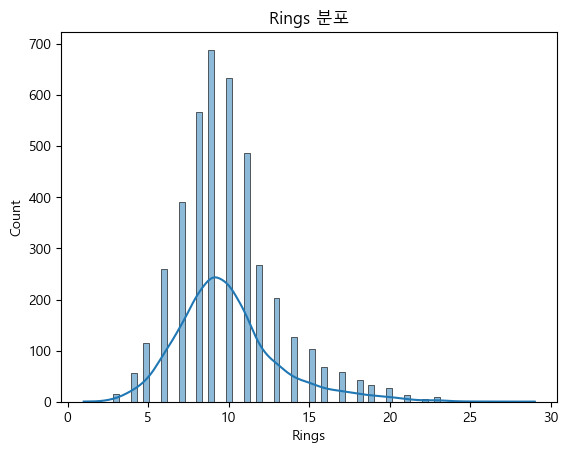

SVM 정확도: 0.7799

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.73      0.77       424
           1       0.75      0.83      0.79       412

    accuracy                           0.78       836
   macro avg       0.78      0.78      0.78       836
weighted avg       0.78      0.78      0.78       836

SVM Confusion Matrix:
 [[309 115]
 [ 69 343]]
Logistic Regression 정확도: 0.7799

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.75      0.78       424
           1       0.76      0.81      0.78       412

    accuracy                           0.78       836
   macro avg       0.78      0.78      0.78       836
weighted avg       0.78      0.78      0.78       836

Logistic Regression Confusion Matrix:
 [[319 105]
 [ 79 333]]
Random Forest 정확도: 0.7943

Random Forest Classification Report:
               precision    recall  f1-score   suppo

In [3]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 한글 깨짐 방지
%matplotlib inline                                   
from matplotlib import font_manager, rc                            
plt.rcParams['axes.unicode_minus'] = False                          
f_path = "c:/Windows/Fonts/malgun.ttf"                              
font_name = font_manager.FontProperties(fname=f_path).get_name()    
rc('font', family=font_name)    

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# !pip install koreanize-matplotlib

# 데이터 로드 (GitHub에서 다운로드)
url = 'https://github.com/MyungKyuYi/AI-class/raw/main/abalone.csv'
data = pd.read_csv(url)

# 1. EDA (탐색적 데이터 분석)
# 데이터 요약
print(data.info())
print(data.describe())

# 결측치 확인
print("결측치 개수:\n", data.isnull().sum())

# 데이터 분포 시각화 (Rings 값의 분포)
sns.histplot(data['Rings'], kde=True)
plt.title('Rings 분포')
plt.show()

# 'Sex' 열을 One-hot 인코딩
data = pd.get_dummies(data, columns=['Sex'], drop_first=True)

# Rings를 기준으로 이진 분류 (10 이상 성숙, 10 미만 미성숙)
data['Rings'] = (data['Rings'] >= 10).astype(int)

# 2. 데이터 전처리
# X는 'Rings'를 제외한 나머지 특성, y는 예측할 레이블 'Rings'
X = data.drop('Rings', axis=1)
y = data['Rings']

# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

# 표준화 (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. 모델 학습 및 평가
# 분류기들 초기화
classifiers = {
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=2024),
    'Decision Tree': DecisionTreeClassifier(random_state=2024),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# 각 모델 학습 및 평가
for name, clf in classifiers.items():
    # 모델 학습
    clf.fit(X_train, y_train)
    
    # 테스트 데이터에 대한 예측
    y_pred = clf.predict(X_test)
    
    # 성능 평가
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} 정확도: {accuracy:.4f}")
    
    # 추가적인 평가 지표 출력 (classification report와 confusion matrix)
    print(f"\n{name} Classification Report:\n", classification_report(y_test, y_pred))
    print(f"{name} Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("="*60)
